In [52]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('df_2013.csv')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938464 entries, 0 to 938463
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     938464 non-null  float64
 1   asin        938464 non-null  object 
 2   reviewText  938464 non-null  object 
 3   time        938464 non-null  object 
 4   year        938464 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 35.8+ MB


In [60]:
data

,overall,asin,reviewText,time,year
0,5.0,0001713353,I remember reading my parents' copy of this bo...,2013-10-08,2013
1,5.0,0001713353,I am very happy with the book!!! It is one of...,2013-01-12,2013
2,5.0,0001061240,I rated this a five because it's the first boo...,2013-10-02,2013
3,5.0,0001061240,"A must for every home, with or without childre...",2013-09-13,2013
4,5.0,0001061240,"One of my daughters, growing up, also loved th...",2013-08-27,2013
...,...,...,...,...,...
938459,3.0,0692716297,Bottom line is find the thing your dog likes b...,2013-05-25,2013
938460,3.0,0692716297,"I enjoyed the content of the book, but found m...",2013-05-17,2013
938461,5.0,0692716297,I have a large dog that is hard to take for wa...,2013-05-16,2013
938462,2.0,0692730303,"This book needs to be in paperback/hardcover, ...",2013-12-21,2013


In [61]:
df = data.copy()

In [62]:
df.drop(['time', 'year'], axis = 1, inplace = True)

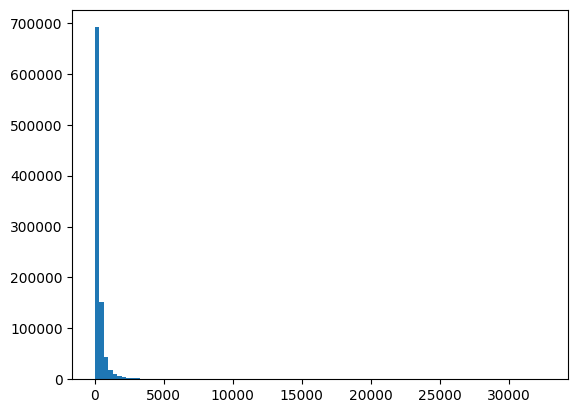

In [63]:
length_review = df['reviewText'].str.len() 
plt.hist(length_review, bins=100)
plt.show()

In [64]:
df['word_count'] = df['reviewText'].str.len() 

In [65]:
df.describe()

,overall,word_count
count,938464.000000,938464.000000
mean,4.389108,345.974444
std,0.958847,538.084909
min,1.000000,1.000000
25%,4.000000,133.000000
50%,5.000000,190.000000
75%,5.000000,341.000000
max,5.000000,32699.000000


In [66]:
df.drop_duplicates(inplace = True, ignore_index=True)
df.shape

(937322, 4)

In [67]:
df = df[df['word_count'] < 1001]
df.shape

(886088, 4)

In [68]:
def preprocess(text_string):
    space_pattern = '\s+'
    new_line = '\n+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    non_word_char = '[^\w]'
    underscore = '_[\w]+'
    
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(new_line, ' ', parsed_text)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(non_word_char, ' ', parsed_text)
    parsed_text = re.sub('([0-9]+)', '', parsed_text)
    parsed_text = re.sub(underscore, ' ', parsed_text)
    
    return parsed_text

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [69]:
df['review'] = np.vectorize(preprocess)(df['reviewText'])

In [70]:
df['review'] = np.vectorize(deEmojify)(df['review'])

In [71]:
df['review'] = df['review'].str.strip()

In [72]:
df['review'] = df['review'].apply(lambda x: x.split())

In [73]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

In [74]:
df['review'] = df['review'].apply(lambda x: list(filter(lambda y: not y in stop_words, x)))


In [75]:
df['n_words'] = df['review'].str.len() 

In [76]:
df = df.reset_index(drop=True)

In [77]:
df

,overall,asin,reviewText,word_count,review,n_words
0,5.0,0001713353,I remember reading my parents' copy of this bo...,404,"[I, remember, reading, parents, copy, book, fe...",38
1,5.0,0001713353,I am very happy with the book!!! It is one of...,121,"[I, happy, book, It, one, children, favorite, ...",13
2,5.0,0001061240,I rated this a five because it's the first boo...,399,"[I, rated, five, first, book, I, used, introdu...",37
3,5.0,0001061240,"A must for every home, with or without childre...",131,"[A, must, every, home, without, children, Deli...",15
4,5.0,0001061240,"One of my daughters, growing up, also loved th...",436,"[One, daughters, growing, also, loved, book, I...",40
...,...,...,...,...,...,...
886083,3.0,0692716297,Bottom line is find the thing your dog likes b...,112,"[Bottom, line, find, thing, dog, likes, best, ...",12
886084,3.0,0692716297,"I enjoyed the content of the book, but found m...",159,"[I, enjoyed, content, book, found, wanting, On...",16
886085,5.0,0692716297,I have a large dog that is hard to take for wa...,229,"[I, large, dog, hard, take, walks, I, going, t...",26
886086,2.0,0692730303,"This book needs to be in paperback/hardcover, ...",131,"[This, book, needs, paperback, hardcover, some...",12
